# Time Series Forecasting Demonstration (Sales Datasets)--LSTM (Sequence to Sequence - One Step-Ahead) -- Data Preparation/Exploratory -- a) Univariate Time Series, b)  Input-Output Time Series 

**--------------------------------------------------------------------------------------------------------------------------**
**--------------------------------------------------------------------------------------------------------------------------**
**--------------------------------------------------------------------------------------------------------------------------**
**---------------------------------------------------**


**STRUCTURE**

*This work presents two case studies that demonstrate the use of the LSTM Deep Learning model for 'sequence to sequence' time series forecasting, based on two datasets comprising monthly alcohol and beer sales records. **PART A** of this project is focused on data preparation/manipulation of the imported dataset features (Alcohol_Sales and Beer_Sales) to apply all necessary data preprocessing/cleaning methods by use of numpy and pandas (i.e. adding new column to the dataframe, rename column,'date' feature conversion to datetime object and use as index, feature engineering to extract datetime categories,identification and dropping of rows with missing entries,mapping). Moreover, an exploratory analysis is provided in this section to highlight key aspects of both dataset time series with respect to their past observations, so as to get meaningful insights in terms of their distribution, correlations, and their behavior when grouped at different time periods.*

*In the second part of this demonstration (**Part B**), the forecasting capabilities of the LSTM model are investigated. In **Case Study I**, the LSTM model is trained to forecast the total amount of beer sales (univariate time series) over the next 12 months, by creating a time series input sequence of 12 time steps and an output sequence of the same length(one-step ahead) consisting of the monthly 'Beer_Sales' feature with the initial sequence being X[index 0:11] and y[index 12:23]. The last 12 month values of the 'Beer_Sales' feature comprise the X_test values that are used as LSTM inputs, after the end of the training process, to predict the new 'Beer_Sales' sequence.*

*The main difference between **Case Study I** and **Case Study II** is that in the latter the LSTM output (Beer Sales - dependent LSTM parameter) is determined by using the 'Alcohol Sales' feature as the LSTM input (independent parameter) during the training process of the neural network model.  Dataset is split into training and test samples so as to use the X_test samples as the new LSTM model inputs and the y_test samples for the comparison of the expected (target) and the forecasted LSTM values. For the evaluation of the LSTM model performance, plots of the forecasted values against the actual(test) Beer Sales values are presented (Performance Metric --> Root Mean Squared Error).*



**The Dataset (.csv file format) for this project has been obtained from Kaggle:**

"*Time Series Forecasting*" -- Files: "Alcohol_Sales.csv" & "BeerWineLiquor.csv" -- Source:https://www.kaggle.com/bulentsiyah/for-simple-exercises-time-series-forecasting?select=Alcohol_Sales.csv



# Part A 

***Data Prepararation for Machine Learning - Exploratory Analysis*** 

In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importing the  Datasets
data=pd.read_csv('Alcohol_Sales.csv')
data1=pd.read_csv('BeerWineLiquor.csv')

In [3]:
# Adding the 'Beer Sales' feature to the 'Alcohol Sales' dataset
data['Beer_Sales']=data1['beer']

In [4]:
# Column renaming
data.rename(columns={'S4248SM144NCEN':'Alcohol_Sales'},inplace=True)
data.head(2)

,DATE,Alcohol_Sales,Beer_Sales
0,1992-01-01,3459,1509.0
1,1992-02-01,3458,1541.0


In [5]:
# Dataset Information regarding a) the data type of each feature and b) total values per feature. Dataset comprises
# one 'object',one 'float' and one 'int' dtype column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325 entries, 0 to 324
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   DATE           325 non-null    object 
 1   Alcohol_Sales  325 non-null    int64  
 2   Beer_Sales     324 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 7.7+ KB


In [6]:
#Last five entries
data.tail()

,DATE,Alcohol_Sales,Beer_Sales
320,2018-09-01,12396,4598.0
321,2018-10-01,13914,4737.0
322,2018-11-01,14174,5130.0
323,2018-12-01,15504,6370.0
324,2019-01-01,10718,NaN


In [7]:
# Dropping the last record as the Beer Sales entry is 'NaN'
data=data.drop(index=324,axis=0)
data.tail(2)

,DATE,Alcohol_Sales,Beer_Sales
322,2018-11-01,14174,5130.0
323,2018-12-01,15504,6370.0


In [8]:
# Dataset columns do not have any other 'NaN' entries 
data.isnull().sum()

DATE             0
Alcohol_Sales    0
Beer_Sales       0
dtype: int64

In [9]:
# 'DATE' column is converted from 'object' data type to 'datetime' 
data['DATE'] = pd.to_datetime(data['DATE'])
# Feature Engineering is applied to extract the Months and Years from the 'DATE' column
data['Year'] = data['DATE'].apply(lambda date:date.year)
data['Month'] = data['DATE'].apply(lambda date:date.month)
data.head(2)

,DATE,Alcohol_Sales,Beer_Sales,Year,Month
0,1992-01-01,3459,1509.0,1992,1
1,1992-02-01,3458,1541.0,1992,2


In [10]:
# 'DATE' column is set as dataset index
data=data.set_index(['DATE'])
data.head(2)

,Alcohol_Sales,Beer_Sales,Year,Month
DATE,,,,
1992-01-01,3459,1509.0,1992,1
1992-02-01,3458,1541.0,1992,2


In [11]:
# Mapping to rename the entries of the 'Month' column
data['Month'] = data['Month'].map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',
                                  6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})
data.head(2)

,Alcohol_Sales,Beer_Sales,Year,Month
DATE,,,,
1992-01-01,3459,1509.0,1992,Jan
1992-02-01,3458,1541.0,1992,Feb


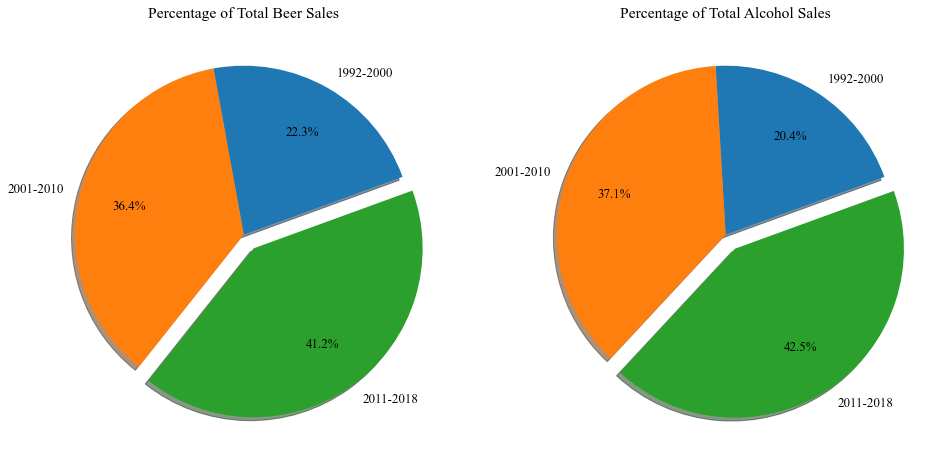

In [12]:
# Total number of beer and alcohol sales for specified datetime periods
first_sum=data[data.index<='2000-12-01'].sum()
sec_sum=data[(data.index>='2001-01-01')&(data.index<='2010-12-01')].sum()
third_sum=data[(data.index>='2011-01-01')&(data.index<='2018-12-01')].sum()

# Pie chart presenting the Percentage of Beer and Alcohol total Sales. As it has been observed, there has been an increase,
# this decade, in the number of Beer/Alcohol sales with respect to the previous 2 decades
fig, axes = plt.subplots(1,2,figsize=(14,14))

plt.rcParams['font.sans-serif'] = 'Times New Roman'
plt.rcParams['font.family'] = 'Times New Roman, serif'
plt.rcParams['text.color'] = 'black'
plt.rcParams['axes.labelcolor']= 'black'
plt.rcParams['xtick.color'] = 'black'
plt.rcParams['ytick.color'] = 'black'
plt.rcParams['font.size']=13
labels =['1992-2000','2001-2010','2011-2018']
count = [first_sum['Beer_Sales'],sec_sum['Beer_Sales'],third_sum['Beer_Sales']]
explode = (0,0,0.1)
axes[0].pie(count,explode=explode,labels=labels,pctdistance=0.7,
       autopct='%1.1f%%', labeldistance=1.1,shadow=True, startangle=20)
axes[0].set_title("Percentage of Total Beer Sales")


labels =['1992-2000','2001-2010','2011-2018']
count = [first_sum['Alcohol_Sales'],sec_sum['Alcohol_Sales'],third_sum['Alcohol_Sales']]
explode = (0,0,0.1)
axes[1].pie(count,explode=explode,labels=labels, pctdistance=0.7,
       autopct='%1.1f%%', labeldistance=1.1, shadow=True, startangle=20)
axes[1].set_title("Percentage of Total Alcohol Sales")

for ax in axes.flat:
    ax.figure.tight_layout(pad=3);

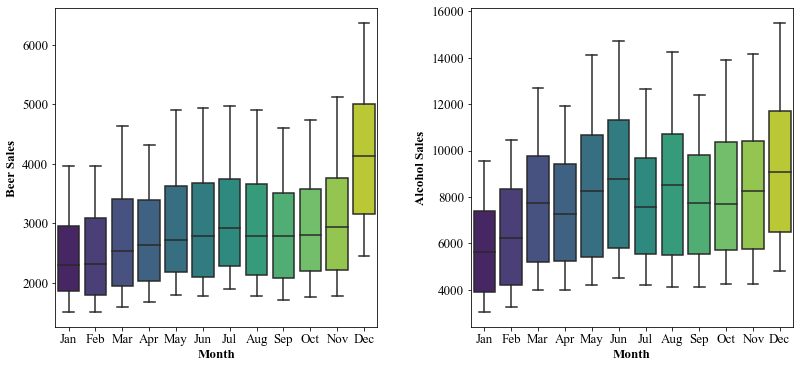

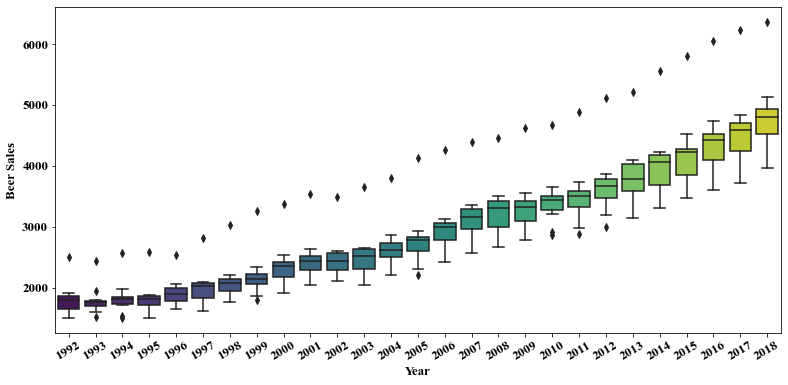

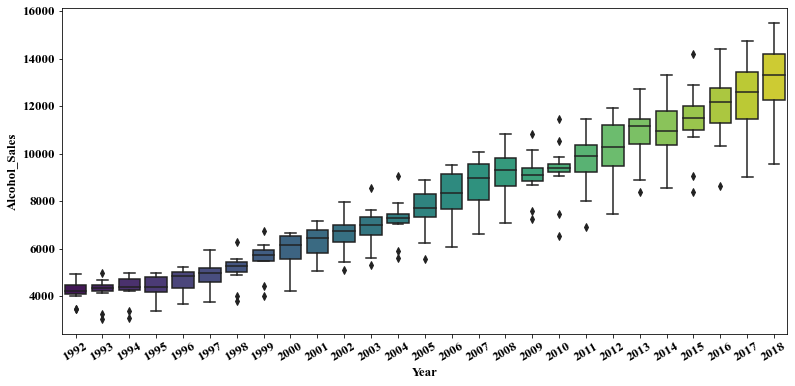

In [13]:
# Boxplots of Beer and Alcohol sales grouped by Month and Year. Based on the 'Months' boxplot, it can be observed that
# for both Beer and Alcohol sales, December has been the month with the highest sales (median value), whereas January the 
# month with the lowest sales (median value). In general, it is clear that the total number of Beer and Alcohol sales 
# increases over the years.
fig,axs=plt.subplots(1,2,figsize=(12,6))
plt.rcParams["font.weight"] = "bold"
plt.rcParams['font.size']=13

sns.boxplot(x='Month',data=data,y='Beer_Sales',palette='viridis',ax=axs[0])
axs[0].set_ylabel('Beer Sales',fontweight='bold')
sns.boxplot(x='Month',data=data,y='Alcohol_Sales',palette='viridis',ax=axs[1])
axs[1].set_ylabel('Alcohol Sales',fontweight='bold')
for ax in axs.flat:
    ax.set_xlabel('Month',fontweight='bold')
    ax.figure.tight_layout(pad=3)
plt.rcParams["font.weight"] = "bold"
plt.rcParams['font.size']=13
plt.figure(figsize=(13,6))
sns.boxplot(x='Year',data=data,y='Beer_Sales',palette='viridis')
plt.xlabel('Year',fontweight='bold')
plt.ylabel('Beer Sales',fontweight='bold')
plt.xticks(rotation=30)
plt.figure(figsize=(13,6))
plt.xlabel('Year',fontweight='bold')
plt.ylabel('Alchohol Sales',fontweight='bold')
sns.boxplot(x='Year',data=data,y='Alcohol_Sales',palette='viridis')
plt.xticks(rotation=30);



C:\Users\geoto\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\geoto\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\geoto\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an 

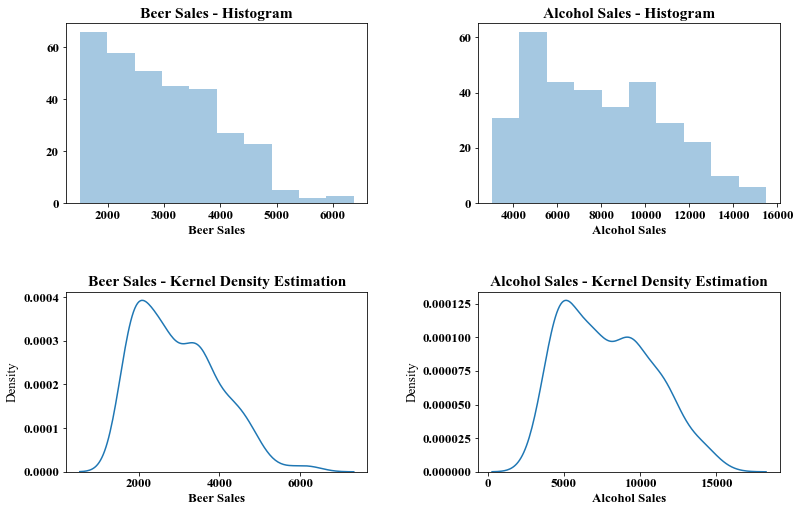

In [14]:
# Beer and Alcohol sales histogram and kernel density estimation plots
fig,axs=plt.subplots(2,2,figsize=(12,8))
plt.rcParams["font.weight"] = "bold"
plt.rcParams['font.size']=13

sns.distplot(data['Beer_Sales'],kde=False,bins=10,ax=axs[0,0])
axs[0,0].set_title('Beer Sales - Histogram',fontweight='bold')
axs[0,0].set_xlabel('Beer Sales',fontweight='bold')

sns.distplot(data['Alcohol_Sales'],kde=False,bins=10,ax=axs[0,1])
axs[0,1].set_title('Alcohol Sales - Histogram',fontweight='bold')
axs[0,1].set_xlabel('Alcohol Sales',fontweight='bold')

sns.distplot(data['Beer_Sales'],kde=True,hist=False,ax=axs[1,0])
axs[1,0].set_title('Beer Sales - Kernel Density Estimation',fontweight='bold')
axs[1,0].set_xlabel('Beer Sales',fontweight='bold')

sns.distplot(data['Alcohol_Sales'],kde=True,hist=False,ax=axs[1,1])
axs[1,1].set_title('Alcohol Sales - Kernel Density Estimation',fontweight='bold')
axs[1,1].set_xlabel('Alcohol Sales',fontweight='bold')

for ax in axs.flat:
    
    ax.figure.tight_layout(pad=3);

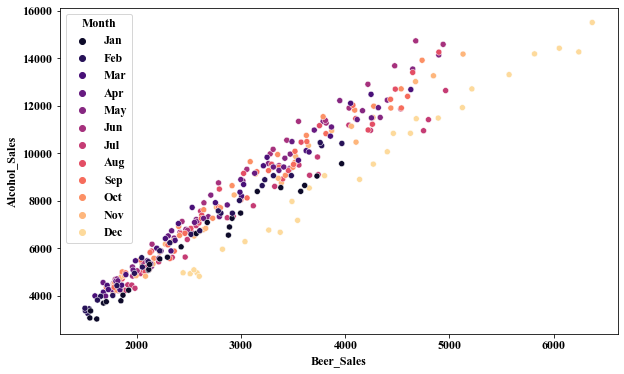

In [15]:
#Scatterplot, presenting the Beer-Alcohol sales relationship.
plt.figure(figsize=(10,6))
plt.rcParams["font.weight"] = "bold"
plt.rcParams['font.size']=12
sns.scatterplot(x='Beer_Sales',y='Alcohol_Sales',data=data,palette='magma',hue='Month')
plt.xlabel('Beer_Sales',fontweight='bold')
plt.ylabel('Alcohol_Sales',fontweight='bold');

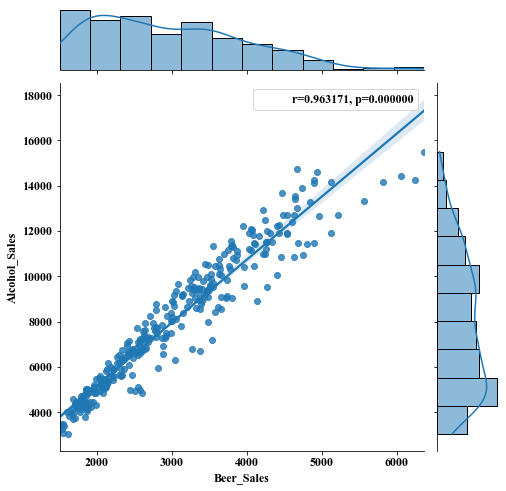

In [16]:
# The 'jointplot', provided below, can be very useful when there is need/requirement to detect outliers.  
# As it can be observed from the plot, the two features seems to be strongly correlated.
import scipy.stats as stats

jointp=sns.jointplot(x=data['Beer_Sales'], y=data['Alcohol_Sales'],height=7, kind='reg')
r, p = stats.pearsonr(data['Beer_Sales'],data['Alcohol_Sales'])
rp, = jointp.ax_joint.plot([], [], linestyle="", alpha=0)
plt.xlabel('Beer_Sales',fontweight='bold')
plt.ylabel('Alcohol_Sales',fontweight='bold')
jointp.ax_joint.legend([rp],['r={:f}, p={:f}'.format(r,p)])
plt.show()

In [17]:
# In this cell, the goal is to determine the percentage of change of Beer sales on a Monthly basis.
# Therefore, monthly Beer sales values are shifted by 1, then the shifted values are subtracted from the original values
# and the difference is divided by the previous monthly value and finally multiplied by 100. 
# The final array is converted into a pd.dataframe and the column is renamed as presented below.
# Negative values indicate a decrease in the Beer sales value with respect to the previous month
beer_sales_month_change=100*((data['Beer_Sales']-data['Beer_Sales'].shift(1))/data['Beer_Sales'].shift(1))
beer_sales_month_change=beer_sales_month_change.dropna()
beer_sales_month_change=pd.DataFrame(beer_sales_month_change)
beer_sales_month_change.rename(columns={'Beer_Sales':'Beer_Sales_Monthly_Change_%'},inplace=True)
beer_sales_month_change.head()

,Beer_Sales_Monthly_Change_%
DATE,
1992-02-01,2.120610
1992-03-01,3.634004
1992-04-01,4.884158
1992-05-01,8.776119
1992-06-01,-2.579583


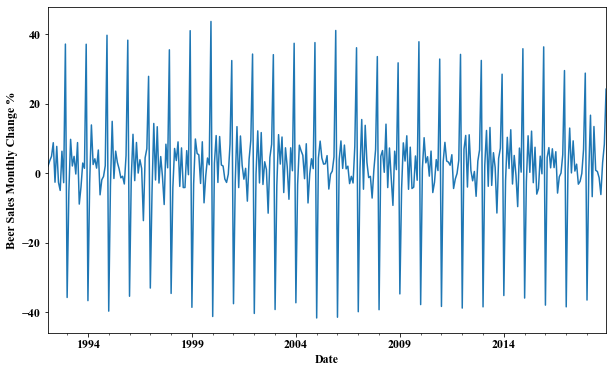

In [18]:
# Plot of the monthly difference percentage in Beer Sales
plt.figure(figsize=(10,6))
beer_sales_month_change['Beer_Sales_Monthly_Change_%'].plot()
plt.xlabel('Date',fontweight='bold')
plt.ylabel('Beer Sales Monthly Change %',fontweight='bold');

C:\Users\geoto\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


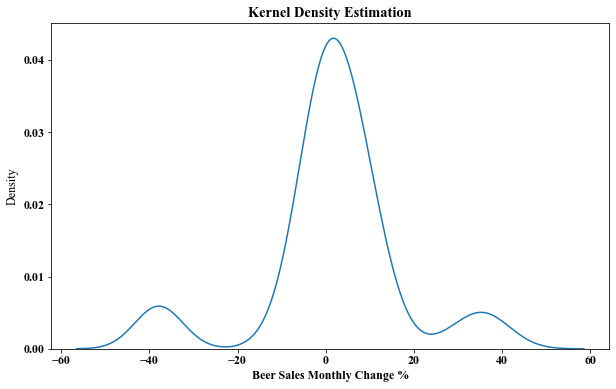

In [19]:
# Beer Sales Monthly Change % - Kernel Density Estimation plot
plt.figure(figsize=(10,6))
plt.xlabel('Beer Sales Monthly Change %',fontweight='bold')
plt.title('Kernel Density Estimation',fontweight='bold')
sns.distplot(beer_sales_month_change,kde=True,hist=False);

In [20]:
# Beer sales monthly change percentage statistics
beer_sales_month_change.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Beer_Sales_Monthly_Change_%,323.0,1.80195,15.744319,-41.620626,-2.749904,2.072109,7.342106,43.642763


In [21]:
# Similar to the Beer sales monthly change,the percentage of change of Alcohol sales on a Monthly basis is determined
alcohol_sales_month_change=100*((data['Alcohol_Sales']-data['Alcohol_Sales'].shift(1))/data['Alcohol_Sales'].shift(1))
alcohol_sales_month_change=alcohol_sales_month_change.dropna()
alcohol_sales_month_change=pd.DataFrame(alcohol_sales_month_change)
alcohol_sales_month_change.rename(columns={'Alcohol_Sales':'Alcohol_Sales_Monthly_Change_%'},inplace=True)
alcohol_sales_month_change.head()

,Alcohol_Sales_Monthly_Change_%
DATE,
1992-02-01,-0.028910
1992-03-01,15.731637
1992-04-01,14.042979
1992-05-01,-7.515337
1992-06-01,7.296849


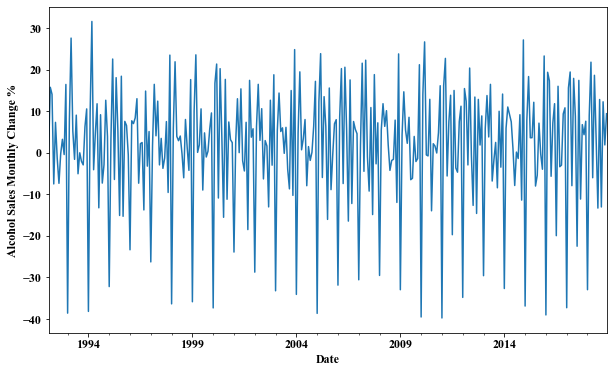

In [22]:
# Plot of the monthly difference percentage in Alcohol Sales
plt.figure(figsize=(10,6))
alcohol_sales_month_change['Alcohol_Sales_Monthly_Change_%'].plot()
plt.xlabel('Date',fontweight='bold')
plt.ylabel('Alcohol Sales Monthly Change %',fontweight='bold');

C:\Users\geoto\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


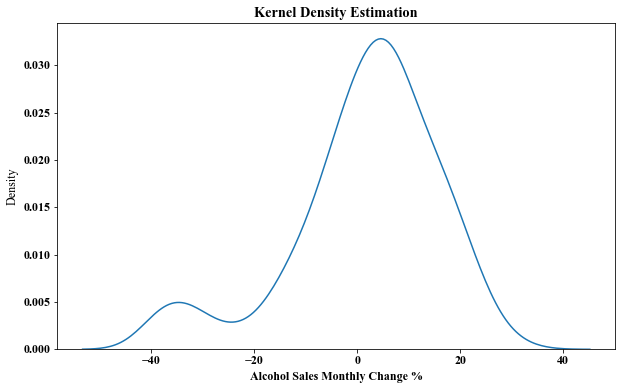

In [23]:
# Alcohol Sales Monthly Change % - Kernel Density Estimation plot
plt.figure(figsize=(10,6))
plt.xlabel('Alcohol Sales Monthly Change %',fontweight='bold')
plt.title('Kernel Density Estimation',fontweight='bold')
sns.distplot(alcohol_sales_month_change,kde=True,hist=False);

In [24]:
# Alcohol sales monthly change percentage statistics
alcohol_sales_month_change.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Alcohol_Sales_Monthly_Change_%,323.0,1.621921,14.405324,-39.755565,-4.322277,3.728037,10.92829,31.566479


# Part B - - Case Study I

***Sequence to Sequence Univariate Time Series Forecasting***

In [25]:
# Function to create the input and output sequences. In this case, since the aim is to make sequence to sequence predictions
# the xseq  is equal to the number of time steps starting from index 0, whereas the yseq is equal to the
# number of prediction steps starting from end_index + 1.

from numpy import array

def set_seq(seq, inp_seq_len,target_seq_len):
    X = []
    y = []
    for t in range(len(seq)):
        end = t + inp_seq_len # End index is equal to the current index plus the specified number of time steps
        if end+target_seq_len> len(seq):# stop if the sequence exceeds the length of the initial array
            break
        
# Input Sequence starts at the current index [t] and ends at index [t + t_steps-1] (or end-1)
# Output Sequence starts at index [t + t_steps](or end) until index [end+pred_steps-1]

# i.e for time steps=12 : X_inputs ->current input value plus 11 past observations [indexes 0-11] (12 steps),
# y_out -> 12 target values from index 12 to index 23 ( 12 steps)
        Xseq = seq[t:end,:1]
        yseq = seq[end:end+target_seq_len,-1]
        X.append(Xseq)
        y.append(yseq)
    return array(X), array(y) #initializing the arrays

In [26]:
# Input/Output sequence of the LSTM model (it is the same as in the first scenario a univariate time series is examined)
seq =data['Beer_Sales'].values


In [27]:
# Reshaping the sequence so as to convert it into 2d shape
seq = seq.reshape((len(seq), 1))


In [28]:
# Selecting the input sequence length and the length of the prediction horizon (target sequence length)
inp_seq_len= 12
target_seq_len=12
# Splitting the dataset into training and test set 
train=seq[:-target_seq_len]
test=seq[-target_seq_len:]



In [29]:
# The shape of training and test data
print(train.shape,test.shape)



(312, 1) (12, 1)


In [30]:
# MinMaxScaler is used to transform dataset columns by scaling them between 0 & 1.Training samples are first fitted 
# and then transformed, whereas the test samples are transformed based on the previously fitted training samples in order
# to avoid forecasting with a biased ML model.
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
train=scaler.fit_transform(train)
test=scaler.transform(test)


In [31]:
# Creating the training sequences
Xtrain_seq,ytrain_seq=set_seq(train, inp_seq_len,target_seq_len)

In [32]:
# The input training data have been converted into 3d shape--> [sample_length,target_seq_len, number of input features]
print(Xtrain_seq.shape)
print(ytrain_seq.shape)

(289, 12, 1)
(289, 12)


In [33]:
# Presenting the first training sequence. As it can be observed, the first 12 input entries (time steps=12),
# i.e. the current index input value at time step 12 and the past 11 observations for the input, together with the
# 12 targets starting at time step 13 (one-step ahead),comprise the first sequence.

print(Xtrain_seq[0], ytrain_seq[0])



[[0.00168776]
 [0.00843882]
 [0.02025316]
 [0.03670886]
 [0.06772152]
 [0.05780591]
 [0.08670886]
 [0.07616034]
 [0.05675105]
 [0.08037975]
 [0.06962025]
 [0.21308017]] [0.02383966 0.00590717 0.03734177 0.04472574 0.06223629 0.06139241
 0.09472574 0.05822785 0.04345992 0.05400844 0.0592827  0.19873418]


In [34]:
# As it can be observed, the first  output sequence values correspond to the y_train values of indexes 12 to 23 (equal to time
# steps 13 to 24)
train[12:24]

array([[0.02383966],
       [0.00590717],
       [0.03734177],
       [0.04472574],
       [0.06223629],
       [0.06139241],
       [0.09472574],
       [0.05822785],
       [0.04345992],
       [0.05400844],
       [0.0592827 ],
       [0.19873418]])

In [35]:
# Defining the number of input features
features_num = Xtrain_seq.shape[2]
features_num

1

In [36]:
# Importing the necessary libraries to create/construct the neural network model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM
from tensorflow.keras import initializers
import tensorflow as tf
# Use of the he_uniform initializer to set the initial random weights of the model layers. 
initializer = tf.keras.initializers.he_uniform(seed=0)
model = Sequential()
model.add(LSTM(12, activation='relu',input_shape=(inp_seq_len, features_num),
               kernel_initializer=initializer))


# The output layer consists of 12 neurons with a 'linear' activation fuction
model.add(Dense(target_seq_len,activation='linear',kernel_initializer=initializer))
# The model is compiled with selected loss function= 'mse', whereas the selected optimizer is 'adam' with a learning rate
# of 0.001, epsilon=1e-8 and with the default values of the exponential decay rates for the first and
# second moment estimates
opt = tf.keras.optimizers.Adam(learning_rate=0.001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-8)

model.compile(optimizer=opt, loss='mse')

# Fitting the LSTM model 
model.fit( Xtrain_seq, ytrain_seq,epochs=250, batch_size=1, shuffle=False)




Epoch 1/250
289/289 [==============================] - 1s 2ms/step - loss: 0.0123
Epoch 2/250
289/289 [==============================] - 0s 2ms/step - loss: 0.0251
Epoch 3/250
289/289 [==============================] - 1s 2ms/step - loss: 0.0086
Epoch 4/250
289/289 [==============================] - 1s 2ms/step - loss: 0.0055
Epoch 5/250
289/289 [==============================] - 1s 2ms/step - loss: 0.0049
Epoch 6/250
289/289 [==============================] - 1s 2ms/step - loss: 0.0050
Epoch 7/250
289/289 [==============================] - 1s 2ms/step - loss: 0.0049
Epoch 8/250
289/289 [==============================] - 1s 2ms/step - loss: 0.0049
Epoch 9/250
289/289 [==============================] - 1s 2ms/step - loss: 0.0048
Epoch 10/250
289/289 [==============================] - 1s 2ms/step - loss: 0.0047
Epoch 11/250
289/289 [==============================] - 1s 2ms/step - loss: 0.0047
Epoch 12/250
289/289 [==============================] - 1s 2ms/step - loss: 0.0046
Epoch 13/250


289/289 [==============================] - 0s 2ms/step - loss: 0.0033
Epoch 100/250
289/289 [==============================] - 0s 2ms/step - loss: 0.0033
Epoch 101/250
289/289 [==============================] - 1s 2ms/step - loss: 0.0032
Epoch 102/250
289/289 [==============================] - 0s 2ms/step - loss: 0.0032
Epoch 103/250
289/289 [==============================] - 1s 2ms/step - loss: 0.0032
Epoch 104/250
289/289 [==============================] - 0s 2ms/step - loss: 0.0032
Epoch 105/250
289/289 [==============================] - 0s 2ms/step - loss: 0.0032
Epoch 106/250
289/289 [==============================] - 0s 2ms/step - loss: 0.0031
Epoch 107/250
289/289 [==============================] - 1s 2ms/step - loss: 0.0031
Epoch 108/250
289/289 [==============================] - 1s 2ms/step - loss: 0.0031
Epoch 109/250
289/289 [==============================] - 1s 2ms/step - loss: 0.0031
Epoch 110/250
289/289 [==============================] - 1s 2ms/step - loss: 0.0031
Epoch 

289/289 [==============================] - 1s 2ms/step - loss: 0.0023
Epoch 197/250
289/289 [==============================] - 1s 2ms/step - loss: 0.0023
Epoch 198/250
289/289 [==============================] - 1s 2ms/step - loss: 0.0023
Epoch 199/250
289/289 [==============================] - 1s 2ms/step - loss: 0.0023
Epoch 200/250
289/289 [==============================] - 1s 2ms/step - loss: 0.0023
Epoch 201/250
289/289 [==============================] - 1s 2ms/step - loss: 0.0023
Epoch 202/250
289/289 [==============================] - 0s 2ms/step - loss: 0.0023
Epoch 203/250
289/289 [==============================] - 1s 2ms/step - loss: 0.0023
Epoch 204/250
289/289 [==============================] - 1s 2ms/step - loss: 0.0023
Epoch 205/250
289/289 [==============================] - 1s 2ms/step - loss: 0.0023
Epoch 206/250
289/289 [==============================] - 0s 2ms/step - loss: 0.0023
Epoch 207/250
289/289 [==============================] - 1s 2ms/step - loss: 0.0023
Epoch 

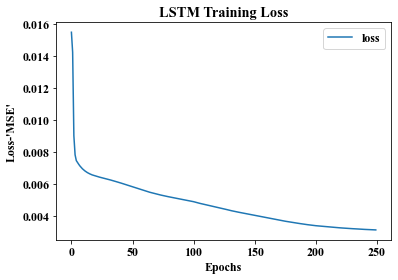

In [37]:
# Training loss plots
loss = pd.DataFrame(model.history.history)
loss.plot()
plt.title('LSTM Training Loss',fontweight='bold')
plt.xlabel('Epochs',fontweight='bold')
plt.ylabel("Loss-'MSE'",fontweight='bold');

In [38]:
# Last training sequence
print(Xtrain_seq[-1],ytrain_seq[-1])

[[0.44493671]
 [0.47932489]
 [0.53797468]
 [0.55126582]
 [0.61223629]
 [0.62721519]
 [0.68565401]
 [0.62848101]
 [0.61877637]
 [0.61940928]
 [0.66940928]
 [0.96054852]] [0.46983122 0.47637131 0.57932489 0.58016878 0.66371308 0.66983122
 0.69556962 0.66371308 0.6407173  0.64029536 0.7056962  1.        ]


In [39]:
# Last 12 'train' values are equal to the Xtrain_seq sequence targets(presented in the cell above), thus they comprise the
# new input values (to get the LSTM forecasted sequence of 12 time steps)
train[-12:]

array([[0.46983122],
       [0.47637131],
       [0.57932489],
       [0.58016878],
       [0.66371308],
       [0.66983122],
       [0.69556962],
       [0.66371308],
       [0.6407173 ],
       [0.64029536],
       [0.7056962 ],
       [1.        ]])

In [40]:
# LSTM forecasted values
batch = train[-12:].reshape(1,inp_seq_len,features_num)
lstm_output = model.predict(batch, verbose=0)
print(lstm_output)

[[0.50281686 0.49979085 0.6284058  0.6132915  0.7564221  0.6729535
  0.65842515 0.7643233  0.66447705 0.631022   0.66538906 1.0301845 ]]


In [41]:
# Inverse transform of the outputs and reshaping to convert the lstm_output into 2D shape
lstm_output=scaler.inverse_transform(lstm_output)
lstm_output=lstm_output.reshape((-1,1))
lstm_output.shape

(12, 1)

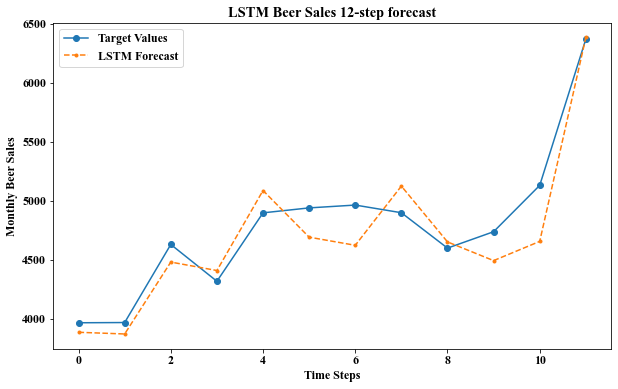

In [42]:
# Plot of the LSTM forecast-target(test) values
plt.figure(figsize=(10,6))
ax=plt.plot(scaler.inverse_transform(test),marker='o',linestyle='-',label='Target Values')
plt.plot(lstm_output,marker='.',linestyle='--',label='LSTM Forecast')
plt.xlabel('Time Steps',fontweight='bold')
plt.ylabel('Monthly Beer Sales',fontweight='bold')
plt.title('LSTM Beer Sales 12-step forecast',fontweight='bold')
plt.legend();

In [43]:
# Timestamp of first forecasted output
data.index[-12]

Timestamp('2018-01-01 00:00:00')

In [44]:
# Creating an LSTM predicted values index
pred_index=pd.date_range(start='2018-01-01',periods=12,freq='M')

In [45]:
# Converting the lstm_output from np.ndarray to pandas dataframe
pred_data=pd.DataFrame(data=lstm_output,index=pred_index,columns=['LSTM Forecast'])

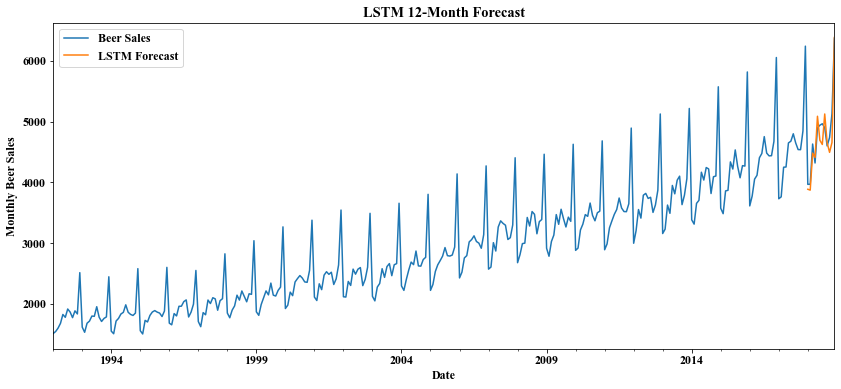

In [46]:
# Plot comprising 'Beer_Sales' feature, and the LSTM forecasts from index 300 (time step 301)  to 311 (time step 312)

ax=data['Beer_Sales'].plot(figsize=(14,6),label='Beer Sales')
pred_data.plot(ax=ax,legend=True)
plt.legend()
plt.title('LSTM 12-Month Forecast',fontweight='bold')
plt.ylabel('Monthly Beer Sales',fontweight='bold')
plt.xlabel('Date',fontweight='bold');

In [47]:
#importing the mean_squared_error
from sklearn.metrics import mean_squared_error

In [48]:
# RMSE of predicted and test Beer Sales values
RMSE=np.sqrt(mean_squared_error(seq[-12:],lstm_output))
RMSE=RMSE.round(2)
RMSE

223.61

# Part B - - Case Study II

***Sequence to Sequence Time Series Forecasting of the parameter of interest (dependent) based on an input (independent) variable***

In [49]:
# Function to create the input and output sequences (same as in Case Study I)

from numpy import array

def set_seq(seq, inp_seq_len,target_seq_len):
    X = []
    y = []
    for t in range(len(seq)):
        end = t + inp_seq_len # End index is equal to the current index plus the specified number of time steps
        if end+target_seq_len> len(seq):# stop if the sequence exceeds the length of the initial array
            break
        
# Input Sequence starts at the current index [t] and ends at index [t + t_steps-1] (or end-1)
# Output Sequence starts at index [t + t_steps](or end) until index [end+pred_steps-1]

# i.e for time steps=12 : X_inputs ->current input value and 11 past observations [indexes 0-11] (12 steps),
# y_out -> 12 target values from index 12 to index 23 ( 12 steps)
        Xseq = seq[t:end,:-1]
        yseq = seq[end:end+target_seq_len,-1]
        X.append(Xseq)
        y.append(yseq)
    return array(X), array(y) #initializing the arrays

In [50]:
# Defining the sequences that comprise the input and output of the LSTM model
in_seq =data['Alcohol_Sales'].values
out_seq =data['Beer_Sales'].values


In [51]:
# Reshaping the input and output sequences so as to convert them into 2d shape
in_seq = in_seq.reshape((len(in_seq), 1))
out_seq = out_seq.reshape((len(out_seq), 1))

In [52]:
# Selecting the length of input sequence and the length of the prediction horizon (target sequence length)
inp_seq_len= 12
target_seq_len=12
# Splitting the dataset into training and test set (y_test -->to compare the LSTM forecasts for given inputs (X_test))
X_test=in_seq[-target_seq_len:]
X_train=in_seq[:-target_seq_len]
y_train=out_seq[:-target_seq_len]
y_test=out_seq[-target_seq_len:]



In [53]:
# The shape of training and test data
print(X_train.shape,X_test.shape)
print(y_train.shape,y_test.shape)



(312, 1) (12, 1)
(312, 1) (12, 1)


In [54]:
# MinMaxScaler is used to transform dataset columns by scaling them between 0 & 1.Training samples are first fitted 
# and then transformed, whereas the test samples are transformed based on the previously fitted training samples in order
# to avoid forecasting with a biased ML model.
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)
y_train=scaler.fit_transform(y_train)
y_test=scaler.transform(y_test)


In [55]:
# Use of hstack to put together the train sequence arrays horizontally 
from numpy import hstack
df_train = hstack((X_train,y_train))
# Creating the training sequences
Xtrain_seq,ytrain_seq=set_seq(df_train, inp_seq_len,target_seq_len)

In [56]:
# The input training data have been converted into 3d shape--> [sample_length,time steps, number of input features]
print(Xtrain_seq.shape)
print(ytrain_seq.shape)

(289, 12, 1)
(289, 12)


In [57]:
# Presenting the first training sequence. As it can be observed, the first 12 input entries (time steps=12),
# i.e. the current index input value at time step 12 plus the past 11 observations for the input, together with the
# 12 output targets starting at time step 13 (one-step ahead),comprise the first sequence.

print(Xtrain_seq[0], ytrain_seq[0])



[[0.03658432]
 [0.03649885]
 [0.08299855]
 [0.13103684]
 [0.1017181 ]
 [0.12804513]
 [0.12266006]
 [0.09453799]
 [0.09359774]
 [0.10496624]
 [0.10334217]
 [0.16283443]] [0.02383966 0.00590717 0.03734177 0.04472574 0.06223629 0.06139241
 0.09472574 0.05822785 0.04345992 0.05400844 0.0592827  0.19873418]


In [58]:
# As in Case Study I, the first  output sequence values correspond to the y_train values of indexes 12 to 23 (equal to time
# steps 13 to 24)
train[12:24]

array([[0.02383966],
       [0.00590717],
       [0.03734177],
       [0.04472574],
       [0.06223629],
       [0.06139241],
       [0.09472574],
       [0.05822785],
       [0.04345992],
       [0.05400844],
       [0.0592827 ],
       [0.19873418]])

In [59]:
# Defining the number of input features
features_num = Xtrain_seq.shape[2]
features_num

1

In [60]:
# Importing the necessary libraries to create/construct the neural network model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM
from tensorflow.keras import initializers
import tensorflow as tf
# Use of the he_uniform initializer to set the initial random weights of the model layers. 
initializer = tf.keras.initializers.he_uniform(seed=0)
model = Sequential()
model.add(LSTM(12, activation='relu',input_shape=(inp_seq_len, features_num),
               kernel_initializer=initializer))
                     

# The output layer consists of 12 neurons with a 'linear' activation fuction
model.add(Dense(target_seq_len,activation='linear',kernel_initializer=initializer))
                    
# The model is compiled with selected loss function= 'mse', whereas the selected optimizer is 'adam' with a learning rate
# of 0.001, epsilon=1e-8 and with the default values of the exponential decay rates for the first and
# second moment estimates
opt = tf.keras.optimizers.Adam(learning_rate=0.001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-8)

model.compile(optimizer=opt, loss='mse')

# Fitting the LSTM model 
model.fit( Xtrain_seq, ytrain_seq,epochs=250, batch_size=1, shuffle=False)




Epoch 1/250
289/289 [==============================] - 3s 3ms/step - loss: 0.0139
Epoch 2/250
289/289 [==============================] - 1s 3ms/step - loss: 0.0179
Epoch 3/250
289/289 [==============================] - 1s 3ms/step - loss: 0.0089
Epoch 4/250
289/289 [==============================] - 1s 3ms/step - loss: 0.0058
Epoch 5/250
289/289 [==============================] - 1s 3ms/step - loss: 0.0048
Epoch 6/250
289/289 [==============================] - 1s 3ms/step - loss: 0.0046
Epoch 7/250
289/289 [==============================] - 1s 3ms/step - loss: 0.0045
Epoch 8/250
289/289 [==============================] - 1s 3ms/step - loss: 0.0045
Epoch 9/250
289/289 [==============================] - 1s 3ms/step - loss: 0.0044
Epoch 10/250
289/289 [==============================] - 1s 2ms/step - loss: 0.0044
Epoch 11/250
289/289 [==============================] - 0s 2ms/step - loss: 0.0044
Epoch 12/250
289/289 [==============================] - 0s 2ms/step - loss: 0.0044
Epoch 13/250


289/289 [==============================] - 1s 2ms/step - loss: 0.0039
Epoch 100/250
289/289 [==============================] - 1s 2ms/step - loss: 0.0038
Epoch 101/250
289/289 [==============================] - 1s 2ms/step - loss: 0.0038
Epoch 102/250
289/289 [==============================] - 1s 2ms/step - loss: 0.0038
Epoch 103/250
289/289 [==============================] - 1s 2ms/step - loss: 0.0038
Epoch 104/250
289/289 [==============================] - 1s 2ms/step - loss: 0.0038
Epoch 105/250
289/289 [==============================] - 1s 2ms/step - loss: 0.0038
Epoch 106/250
289/289 [==============================] - 1s 2ms/step - loss: 0.0038
Epoch 107/250
289/289 [==============================] - 1s 2ms/step - loss: 0.0038
Epoch 108/250
289/289 [==============================] - 1s 2ms/step - loss: 0.0038
Epoch 109/250
289/289 [==============================] - 1s 2ms/step - loss: 0.0038
Epoch 110/250
289/289 [==============================] - 1s 2ms/step - loss: 0.0038
Epoch 

289/289 [==============================] - 1s 2ms/step - loss: 0.0031
Epoch 197/250
289/289 [==============================] - 1s 2ms/step - loss: 0.0031
Epoch 198/250
289/289 [==============================] - 1s 2ms/step - loss: 0.0031
Epoch 199/250
289/289 [==============================] - 1s 2ms/step - loss: 0.0031
Epoch 200/250
289/289 [==============================] - 1s 2ms/step - loss: 0.0031
Epoch 201/250
289/289 [==============================] - 1s 2ms/step - loss: 0.0031
Epoch 202/250
289/289 [==============================] - 1s 2ms/step - loss: 0.0031
Epoch 203/250
289/289 [==============================] - 1s 2ms/step - loss: 0.0031
Epoch 204/250
289/289 [==============================] - 1s 2ms/step - loss: 0.0031
Epoch 205/250
289/289 [==============================] - 1s 2ms/step - loss: 0.0031
Epoch 206/250
289/289 [==============================] - 1s 2ms/step - loss: 0.0031
Epoch 207/250
289/289 [==============================] - 1s 2ms/step - loss: 0.0031
Epoch 

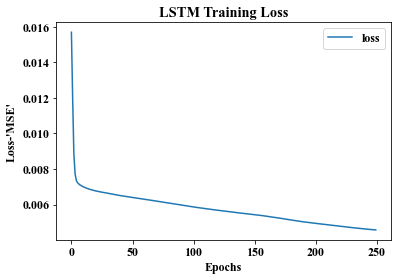

In [61]:
# Training loss plots
loss = pd.DataFrame(model.history.history)
loss.plot()
plt.title('LSTM Training Loss',fontweight='bold')
plt.xlabel('Epochs',fontweight='bold')
plt.ylabel("Loss-'MSE'",fontweight='bold');

In [62]:
# Last inp_train seq. Xtrain_seq[-1] corresponds to inputs X_train[-24:-12] as the model is trained to predict 12 steps ahead
# Therefore the last 12 inputs (X_train[-12:]) are to be used to forecast the new output sequence
print('Last input train sequence:  \n')
print(Xtrain_seq[-1])
print('\r')
print("X_train[-24:12]: \n")
print(X_train[-24:-12])

Last input train sequence:  

[[0.48012651]
 [0.62313018]
 [0.7757928 ]
 [0.71706984]
 [0.78699034]
 [0.91033422]
 [0.67689546]
 [0.8264809 ]
 [0.78989657]
 [0.75852637]
 [0.85349175]
 [0.97358749]]

X_train[-24:12]: 

[[0.48012651]
 [0.62313018]
 [0.7757928 ]
 [0.71706984]
 [0.78699034]
 [0.91033422]
 [0.67689546]
 [0.8264809 ]
 [0.78989657]
 [0.75852637]
 [0.85349175]
 [0.97358749]]


In [63]:
# LSTM forecasts
new_batch = X_train[-12:].reshape(1,inp_seq_len,features_num)
new_lstm_output = model.predict(new_batch, verbose=0)
print(new_lstm_output)

[[0.6278634  0.5388895  0.53593326 0.5551426  0.6023928  0.6866612
  0.6873331  0.66376245 0.6439952  0.6652831  0.7443867  0.98166996]]


In [64]:
# Inverse transform of the outputs and reshaping to convert the lstm_output into 2D shape
new_lstm_output=scaler.inverse_transform(new_lstm_output)
new_lstm_output=new_lstm_output.reshape((-1,1))
new_lstm_output.shape

(12, 1)

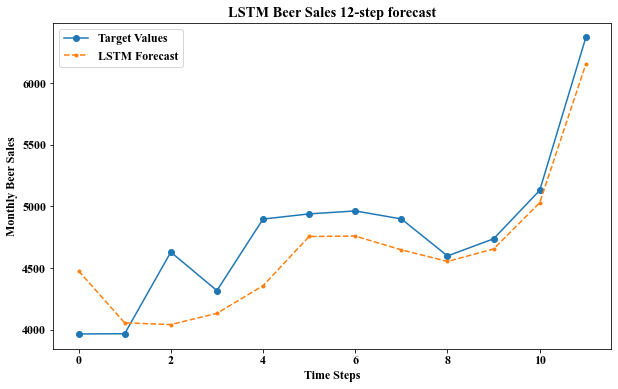

In [65]:
# Plot of the LSTM forecast-target(test) values
y_test=scaler.inverse_transform(y_test)
plt.figure(figsize=(10,6))
ax=plt.plot(y_test,marker='o',linestyle='-',label='Target Values')
plt.plot(new_lstm_output,marker='.',linestyle='--',label='LSTM Forecast')
plt.xlabel('Time Steps',fontweight='bold')
plt.ylabel('Monthly Beer Sales',fontweight='bold')
plt.title('LSTM Beer Sales 12-step forecast',fontweight='bold')
plt.legend();

In [66]:
# Creating an LSTM predicted values index
new_pred_index=pd.date_range(start='2018-01-01',periods=12,freq='M')

In [67]:
# Converting the new_lstm_output from np.ndarray to pandas dataframe
new_pred_data=pd.DataFrame(data=new_lstm_output,index=new_pred_index,columns=['LSTM Forecast'])

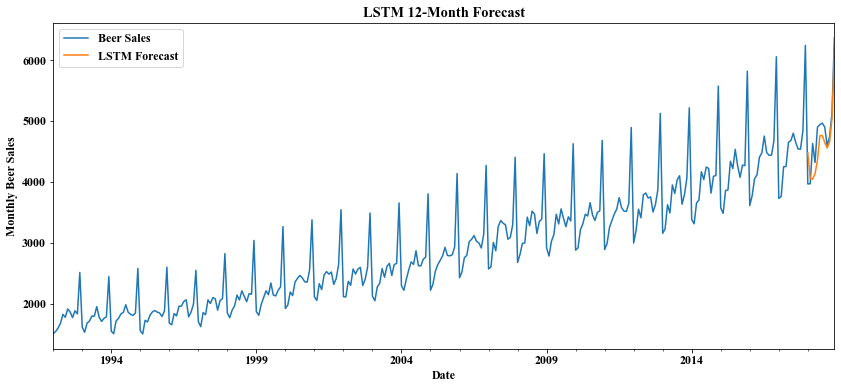

In [68]:
# Plot comprising 'Beer_Sales' feature, and the LSTM forecasts from index 300 (time step 301)  to 311 (time step 312)

ax=data['Beer_Sales'].plot(figsize=(14,6),label='Beer Sales')
new_pred_data.plot(ax=ax,legend=True)
plt.legend()
plt.title('LSTM 12-Month Forecast',fontweight='bold')
plt.ylabel('Monthly Beer Sales',fontweight='bold')
plt.xlabel('Date',fontweight='bold');

In [69]:
# RMSE of forecasted and test Beer Sales values
RMSE=np.sqrt(mean_squared_error(seq[-12:],new_lstm_output))
RMSE=RMSE.round(2)
RMSE

308.95